![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Albane Colmenares
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

***business problem***

The project's goal is to provide Microsoft's head of new movie studio with 3 recommendations for the new movie studio they are creating. The actionable insights are based on data on existing movies' performances by understanding which movies are doing best at the box office. 

From this data, this project will analyze potential causes for these movies to perform so well and how Microsoft can use this information to build their own successful movies.


***data***


***methods*** 

correlation 

***results***


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding


<ins>* Where did the data come from, how do they relate to the data analysis questions***</ins>

The data comes from... 
Main movies' data collection websites: Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database, and The Numbers


<ins>* What do the data represent? Who is in the sample and what variables are included?</ins>

The data represents all movies' key metrics of performance and descriptions: 

Basic movie's descriptions
- their title 
- the studio that created the movie
- in what year the movie first went out in theaters
- how long the movie runs for 
- what genre it belongs to
- in which language it is 
- if the movie and the movie's title was translated 


The persons involved in the movie's creation:
- actors
- directors 
- producers ????????
- writers


How movies were received
- ratings
- by the general public
- by journalists 


Movies' key performance metrics

- revenue generated at box office domestically
- revenue generated at box office in foreign countries 
- budget invested to make the movie




<ins>* What is the target variable?</ins>

The target variable is profit which is calculated by the sum of domestic and foreign box office revenue divided by the budget invested in the movie created. 


<ins>* What are the properties of the variables you intend to use? </ins>



## Data Preparation


***Indicate here what is being done to prepare the data***

5 sources provided 6 sources of data: 
1. Box Office Mojo: bom.movie_gross.csv.gz

2. IMDb: im.db.zip 

3. Rotten Tomatoes: 
* rt.movie_info.tsv.gz 
* & rt.reviews.tsv.gz

4. The Movie Database: tmdb.movies.csv.gz

5. The Numbers: tn.movie_budgets.csv.gz



The next lines of codes will open all data sources to understand what information is accessible, what needs to be cleaned or transformed to use the data for the analysis.


#### Importing standard packages

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

%matplotlib inline


#### 1. bom.movie_gross.csv.gz

In [2]:

# Loading bom.movie_gross and storing data into df_movie_gross
df_movie_gross = pd.read_csv('data/bom.movie_gross.csv.gz', compression='gzip')

df_movie_gross.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Inspect overall shape and info of the dataframe
df_movie_gross.shape
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# Inspect the studios in general
studios = df_movie_gross.drop_duplicates(subset=['studio'])
print(studios['studio'].tolist())
print(len(studios['studio'].tolist()))
# There are 258 production studios, which is large enough to remove 5 
# rows that don't have any studios. 

['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony', 'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS', 'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV', 'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.', 'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW', 'Rog.', nan, 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE', 'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.', 'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.', 'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.', 'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM', 'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket', 'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4', 'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer', 'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP', 'RF', 'ArcEnt', 'PalUni', 'EpicPics', 'EOne', 'LD', 'AF', 'TFA', 'Myr.', 'BM&DH', 'SEG', 'PalT

In [5]:
# Dropping rows
df_movie_gross = df_movie_gross[df_movie_gross['studio'].notna()]
# Verifying that na rows were dropped 
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [6]:
# Inspecting movies that don't have domestic revenue: do they have a 
# foreign revenue? 
df_movie_gross[df_movie_gross['domestic_gross'].isnull()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
936,"Lula, Son of Brazil",NYer,NaN,3800000,2012


In [7]:
# All movies that don't have domestic revenue have foreign revenues so 
# they were distributed oversees 

In [8]:
# Now inspecting the same info for foreign revenue
df_movie_gross[df_movie_gross['foreign_gross'].isnull()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [9]:
# Convert foreign_gross column as float
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].str.replace(',','').astype(np.float64)

# Filling na values with 0 on both columns:
df_movie_gross.update(df_movie_gross[['domestic_gross', 'foreign_gross']].fillna(0))

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


#### 2. im.db.zip

In [10]:
# Loading and inspecting available datasets
# Loading bom.movie_gross and storing data into df_movie_gross

import zipfile
with zipfile.ZipFile('data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


In [11]:
# Loading im.db and storing data into df_imdb

# Creating connection to database
conn = sqlite3.connect('data/im.db')

# Creating a cursor
cur = conn.cursor()


In [12]:
# Opening imdb database
imdb = pd.read_sql("""
                SELECT * 
                FROM sqlite_master
                ;
""", con=conn)
imdb

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [13]:
# Now  each table that are contained in imdb into a dataframe


In [14]:
# Opening and storing movie_basics table

movie_basics = pd.read_sql(
"""
SELECT * 
FROM movie_basics
;
"""
, con=conn)

movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
movie_basics.info()

# start_year will be used to merge the dataframes and is an integer type: 
# will convert the string to integrer type in df_movie_budgets



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [16]:
# Opening and storing directors table

directors_df = pd.read_sql(
"""
SELECT * 
FROM directors
;
"""
, con=conn)

directors_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [17]:
# Opening and storing known_for table

known_for_df = pd.read_sql(
"""
SELECT * 
FROM known_for
;
"""
, con=conn)

known_for_df

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [18]:
# Opening and storing movie_akas table

movie_akas_df = pd.read_sql(
"""
SELECT * 
FROM movie_akas
;
"""
, con=conn)

movie_akas_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [19]:
# movie_id for Marvel's The Avengers where original_title = 1 
movie_akas_df[(movie_akas_df["title"].str.contains("Avengers")) & (movie_akas_df["is_original_title"] == 1)]

,movie_id,ordering,title,region,language,types,attributes,is_original_title
69881,tt2395427,24,Avengers: Age of Ultron,None,None,original,None,1.0
81106,tt0848228,19,The Avengers,None,None,original,None,1.0
190575,tt4154796,15,Avengers: Endgame,None,None,original,None,1.0
311338,tt4154756,30,Avengers: Infinity War,None,None,original,None,1.0


In [20]:
# what are region and attributes

# region
movie_akas_df[movie_akas_df["region"].notnull()]


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331695,tt9755806,2,Большая Акула,RU,None,None,None,0.0
331697,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [21]:
# attributes

movie_akas_df[movie_akas_df["attributes"].notnull()]

,movie_id,ordering,title,region,language,types,attributes,is_original_title
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
12,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
13,tt0369610,22,Jurassic World 3D,DE,None,None,3-D version,0.0
14,tt0369610,23,Jurassic World 3D,XWW,None,None,3-D version,0.0
21,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
...,...,...,...,...,...,...,...,...
331578,tt8899108,2,Volviendo a casa,UY,None,None,original subtitled version,0.0
331590,tt8997034,1,Little Germanics,XWW,en,None,informal literal English title,0.0
331633,tt9190740,1,Car Ribna Wali,IN,ur,None,alternative transliteration,0.0
331660,tt9447768,1,The Town School,LK,None,None,alternative transliteration,0.0


In [22]:
# Opening and storing movie_ratings table

movie_ratings_df = pd.read_sql(
"""
SELECT * 
FROM movie_ratings
;
"""
, con=conn)

movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [23]:
# Opening and storing persons table

persons_df = pd.read_sql(
"""
SELECT * 
FROM persons
;
"""
, con=conn)

persons_df


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [24]:
# Opening and storing principals table

principals_df = pd.read_sql(
"""
SELECT * 
FROM principals
;
"""
, con=conn)

principals_df

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [25]:
# Opening and storing writers table

writers_df = pd.read_sql(
"""
SELECT * 
FROM writers
;
"""
, con=conn)

writers_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


#### 3. rt.movie_info.tsv

In [26]:
# Inspecting rt.movie_info file
# Loading rt.movie_info and storing data into df_movie_info

df_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz', compression='gzip', sep='\t')

df_movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [27]:
# Inspect overall shape and info of the dataframe
df_movie_info.shape
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [28]:
# are there other currencies than box office? 

df_movie_info[df_movie_info["currency"].notnull()]["currency"].unique()

# no - only $

array(['$'], dtype=object)

In [29]:
# missing revenues in box office in df_movie_info but is it the same info in the first table

In [30]:
df_movie_info[df_movie_info["box_office"].notnull()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,"794,306",97 minutes,NaN


#### 4. rt.reviews.tsv

In [31]:
# Inspecting rt.reviews file
# Loading rt.reviews and storing data into df_reviews

df_reviews = pd.read_csv('data/rt.reviews.tsv.gz', compression='gzip', sep='\t', encoding = 'unicode_escape')
df_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [32]:
# Inspect overall shape and info of the dataframe
df_reviews.shape
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### 5. tmdb.movies.csv

In [33]:
# Inspecting tmdb.movies file
# Loading tmdb.movies and storing data into df_tmdb_movies
# Dropping the unnamed column as well 


df_tmdb_movies = pd.read_csv('data/tmdb.movies.csv.gz', compression='gzip', index_col=0)
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


If needed to change genre ids, use: explode. 


In [34]:
# Inspect overall shape and info of the dataframe
df_tmdb_movies.shape
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [35]:
# df_tmdb_movies.genre_ids[0]
df_tmdb_movies.genre_ids = df_tmdb_movies.genre_ids.apply(lambda x: x[1:-1].split(','))
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [36]:
df_tmdb_movies[df_tmdb_movies["original_title"].str.contains("(?i)avatar")]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1831,[],278698,en,Avatar Spirits,0.600,2010-06-22,Avatar Spirits,9.5,2
3387,"[878, 27, 53]",79582,en,Aliens vs. Avatars,2.199,2011-09-20,Aliens vs. Avatars,2.4,12
23157,"[12, 10751]",460441,en,Avatar Flight of Passage,0.600,2017-05-01,Avatar Flight of Passage,10.0,1


In [37]:
type(df_tmdb_movies.genre_ids[0])

list

In [38]:
df_tmdb_movies.explode('genre_ids')


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
...,...,...,...,...,...,...,...,...,...
26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1


#### 6. tn.movie_budgets.csv

In [39]:
# Inspecting tn.movie_budgets file
# Loading tn.movie_budgets and storing data into df_movie_budgets

df_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz', compression='gzip')

df_movie_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [40]:
df_movie_budgets.shape
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [41]:
# Make all number columns as integers
columns_to_integers = ["production_budget" , "domestic_gross", "worldwide_gross"]

for column in columns_to_integers:
    df_movie_budgets[column] = df_movie_budgets[column].astype(str).str.replace(",", '').str.replace("$", "").astype(np.int)

df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [42]:
# Create year column

df_movie_budgets["year"] = df_movie_budgets["release_date"].str[-4:].astype(int)

df_movie_budgets["year"]

0       2009
1       2011
2       2019
3       2015
4       2017
        ... 
5777    2018
5778    1999
5779    2005
5780    2015
5781    2005
Name: year, Length: 5782, dtype: int64

In [43]:
# Probably not needed

In [44]:
df_movie_budgets[df_movie_budgets["movie"].str.contains("Avengers")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012
934,35,"Aug 14, 1998",The Avengers,60000000,23385416,48585416,1998


In [45]:
# is id different from movie_id ? 

df_tmdb_movies[df_tmdb_movies["id"] == 27]

# id from df_movie_budgets and df_tmdb_movies don't match. Title is 9 songs when expected The Avengers

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
117,"[18, 10402, 10749]",27,en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170


In [46]:
# End of probably not needed

## Data Exploration


Start building the information that is needed to answer the question 

—> create the data frame to answer each question 

1. Creating the profit metric to determine which movies performed the highest
2. 1st correlation to test: genre and profit 
3. 2nd correlation to test: .... and profit
4. 3rd correlation to test: actors and profit 



Main metric determining the success of a movie = worldwide gross, as the focus is how a movie is performing at box office.  


Both Box Office Mojos and The Numbers' data sources display this information.

In [47]:
# Create a column total gross 
df_movie_gross["total_gross"] = df_movie_gross["domestic_gross"] + df_movie_gross["foreign_gross"]

In [48]:
# Sorting by highest total revenue generated by movies
df_movie_gross.sort_values(by=["total_gross"], ascending=False, inplace=True)
df_movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...,...
3078,2:22,Magn.,400.0,0.0,2017,4.000000e+02
2756,News From Planet Mars,KL,300.0,0.0,2016,3.000000e+02
2757,Satanic,Magn.,300.0,0.0,2016,3.000000e+02
2321,The Chambermaid,FM,300.0,0.0,2015,3.000000e+02


But according to the Numbers, Avatar and Titanic are first 

In [49]:
# Sorting by highest total profit generated by movies
df_movie_budgets.sort_values(by=["worldwide_gross"], ascending=False, inplace=True)
df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015
...,...,...,...,...,...,...,...
5474,75,"Dec 31, 2005",Insomnia Manica,500000,0,0,2005
5473,74,"Jul 17, 2012",Girls Gone Dead,500000,0,0,2012
5472,73,"Apr 3, 2012",Enter Nowhere,500000,0,0,2012
5471,72,"Dec 31, 2010",Drones,500000,0,0,2010


In [50]:
# Does BOM have any data on Avatar? 
# Avatar was released on 2009 while BOM data does not seem to capture this information 

In [51]:
# Verifying the years captured in BOM data to determine which data to base analysis on
df_movie_gross[df_movie_gross["title"].str.contains("Avatar")]

,title,studio,domestic_gross,foreign_gross,year,total_gross
128,Avatar: Special Edition,Fox,10700000.0,22500000.0,2010,33200000.0


In [52]:
years_bom = df_movie_gross["year"].unique().tolist()
sorted(years_bom)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [53]:
years_tn = df_movie_budgets["year"].unique().tolist()
# sorted(years_tn)

In [54]:
df_movie_gross[df_movie_gross["title"].str.contains("Harry Potter")]

,title,studio,domestic_gross,foreign_gross,year,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08


In [55]:
# Data from The Numbers will be used to base the analysis on. 
# It contains movies from 1915 to 2020, while BOM data only contains data from 2010 to 2018.

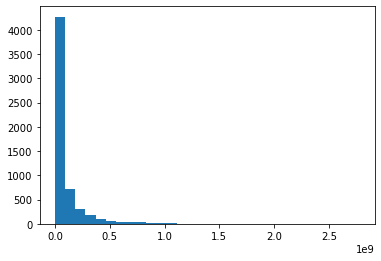

The histogram is highly skewed to the left, indicating most movies are far from making as much as the top performers 


In [56]:
# See distribution through histograms to determine which movies to focus on
x = df_movie_budgets["worldwide_gross"]
# y = df_movie_budgets["id"]
num_bins = 30
plt.hist(x, num_bins)
plt.show()

print("The histogram is highly skewed to the left, indicating most movies are far from making as much as the top performers ")

In [57]:
# Filter on movies that make at least 1B 

In [58]:
# Creating a common column of movie_title among the df_movie_budgets and movie_basics which will be merged later 

# Creating column movie_episode if there were more than 1 movie
df_movie_gross["movie_episode"] = df_movie_gross["title"].str.split(r":").str[1].fillna("").str.title()

# Creating column movie_title if there were more than 1 movie
df_movie_gross["movie_title"] = df_movie_gross["title"].str.split(pat="Ep.").str[0].str.split(pat="Part").str[0].str.split(r"[:)(]").str[0].str.strip().str.title()

# Creating column combining the movie title and the episode to have the same way in both
df_movie_gross["movie_title_episode"] = df_movie_gross["movie_title"] + df_movie_gross["movie_episode"].str.split(r"[:)(]").str[0].str.title()

# df_movie_budgets[["movie", "movie_title", "movie_episode", "movie_title_episode"]]
df_movie_gross[df_movie_gross["title"].str.contains("(?i)avengers")]



,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode,movie_title,movie_title_episode
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,Marvel'S The Avengers,Marvel'S The Avengers
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08,Infinity War,Avengers,Avengers Infinity War


In [59]:
# Creating a common column of movie_title among the df_movie_budgets and movie_basics which will be merged later 

# Creating column movie_episode if there were more than 1 movie
df_movie_budgets["movie_episode"] = df_movie_budgets["movie"].str.split(r":").str[1].fillna("").str.title()

# Creating column movie_title if there were more than 1 movie
df_movie_budgets["movie_title"] = df_movie_budgets["movie"].str.split(pat="Ep.").str[0].str.split(pat="Part").str[0].str.split(r"[:)(]").str[0].str.strip().str.title()

# Creating column combining the movie title and the episode to have the same way in both
df_movie_budgets["movie_title_episode"] = df_movie_budgets["movie_title"] + df_movie_budgets["movie_episode"].str.title()

# df_movie_budgets[["movie", "movie_title", "movie_episode", "movie_title_episode"]]
df_movie_budgets[df_movie_budgets["movie_title"].str.contains("Star Wars")]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_episode,movie_title,movie_title_episode
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,The Force Awakens,Star Wars,Star Wars The Force Awakens
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,The Last Jedi,Star Wars,Star Wars The Last Jedi
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,115000000,474544677,1027044677,1999,The Phantom Menace,Star Wars,Star Wars The Phantom Menace
304,5,"May 19, 2005",Star Wars Ep. III: Revenge of the Sith,115000000,380270577,848998877,2005,Revenge Of The Sith,Star Wars,Star Wars Revenge Of The Sith
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,1977,A New Hope,Star Wars,Star Wars A New Hope
305,6,"May 16, 2002",Star Wars Ep. II: Attack of the Clones,115000000,310676740,656695615,2002,Attack Of The Clones,Star Wars,Star Wars Attack Of The Clones
1783,84,"May 25, 1983",Star Wars Ep. VI: Return of the Jedi,32500000,309205079,572705079,1983,Return Of The Jedi,Star Wars,Star Wars Return Of The Jedi
2367,68,"May 21, 1980",Star Wars Ep. V: The Empire Strikes Back,23000000,290271960,534161334,1980,The Empire Strikes Back,Star Wars,Star Wars The Empire Strikes Back
3831,32,"Aug 15, 2008",Star Wars: The Clone Wars,8500000,35161554,68695443,2008,The Clone Wars,Star Wars,Star Wars The Clone Wars


In [60]:
# Same process in movie_basics 

# Creating column movie_episode if there were more than 1 movie
movie_basics["movie_episode"] = movie_basics["primary_title"].str.split(r":").str[1].fillna("").str.title()

# Creating column movie_title if there were more than 1 movie
movie_basics["movie_title"] = movie_basics["primary_title"].str.split(pat="Ep.").str[0].str.split(pat="Part").str[0].str.split(r"[:)(]").str[0].str.strip().str.title()

# Creating column combining the movie title and the episode to have the same way in both
movie_basics["movie_title_episode"] = movie_basics["movie_title"] +  movie_basics["movie_episode"].str.title()

# df_movie_budgets[["movie", "movie_title", "movie_episode", "movie_title_episode"]]
movie_basics[movie_basics["movie_title"].str.contains("(?i)Avengers")]



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode,movie_title,movie_title_episode
356,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",,The Avengers,The Avengers
1030,tt10075836,The Avengers Assemble Premiere,The Avengers Assemble Premiere,2012,NaN,Action,,The Avengers Assemble Premiere,The Avengers Assemble Premiere
9562,tt1564369,Scavengers,Scavengers,2013,94.0,Sci-Fi,,Scavengers,Scavengers
20812,tt1864488,Scavengers' Union,Somateio rakosyllekton,2011,74.0,"Documentary,News",,Scavengers' Union,Scavengers' Union
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Age Of Ultron,Avengers,Avengers Age Of Ultron
48005,tt2849634,Los Scavengers,Los Scavengers,2014,82.0,"Adventure,Family",,Los Scavengers,Los Scavengers
72820,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Infinity War,Avengers,Avengers Infinity War
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",Endgame,Avengers,Avengers Endgame
105584,tt6172666,Avengers of Justice: Farce Wars,Avengers of Justice: Farce Wars,2018,87.0,"Action,Comedy,Family",Farce Wars,Avengers Of Justice,Avengers Of Justice Farce Wars
138087,tt8875872,Avengers: Reassembled,Avengers: Reassembled,2018,52.0,Sci-Fi,Reassembled,Avengers,Avengers Reassembled


In [61]:
# Filtering on movies above 500 million dollars
half_million_bom = df_movie_gross[df_movie_gross["total_gross"] > 500000000]
half_million_bom

half_million_bom

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode,movie_title,movie_title_episode
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,Marvel'S The Avengers,Marvel'S The Avengers
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,,Black Panther,Black Panther
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09,,Harry Potter And The Deathly Hallows,Harry Potter And The Deathly Hallows
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,The Last Jedi,Star Wars,Star Wars The Last Jedi
...,...,...,...,...,...,...,...,...,...
2776,Dunkirk,WB,188000000.0,337200000.0,2017,5.252000e+08,,Dunkirk,Dunkirk
2337,Kung Fu Panda 3,Fox,143500000.0,377600000.0,2016,5.211000e+08,,Kung Fu Panda 3,Kung Fu Panda 3
1885,Ant-Man,BV,180200000.0,339100000.0,2015,5.193000e+08,,Ant-Man,Ant-Man
3096,Dr. Seuss' The Grinch (2018),Uni.,270600000.0,241000000.0,2018,5.116000e+08,,Dr. Seuss' The Grinch,Dr. Seuss' The Grinch


In [62]:
# Join on movie title and year 
halfmillionbom_basics = pd.merge(half_million_bom, movie_basics, how="left", left_on=["movie_title"], right_on=["movie_title"])

halfmillionbom_basics.head()


,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode_x,movie_title,movie_title_episode_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode_y,movie_title_episode_y
0,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,Marvel'S The Avengers,Marvel'S The Avengers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",Age Of Ultron,Avengers Age Of Ultron
2,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",Infinity War,Avengers Infinity War
3,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron,tt4154796,Avengers: Endgame,Avengers: Endgame,2019.0,181.0,"Action,Adventure,Sci-Fi",Endgame,Avengers Endgame
4,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron,tt8875872,Avengers: Reassembled,Avengers: Reassembled,2018.0,52.0,Sci-Fi,Reassembled,Avengers Reassembled


In [63]:
# Verifying whether any movie were not joined
halfmillionbom_basics[halfmillionbom_basics["movie_id"].isnull()]

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode_x,movie_title,movie_title_episode_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode_y,movie_title_episode_y
0,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,Marvel'S The Avengers,Marvel'S The Avengers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,MIB 3,Sony,179000000.0,445000000.0,2012,6.240000e+08,,Mib 3,Mib 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,Dr. Seuss' The Grinch (2018),Uni.,270600000.0,241000000.0,2018,5.116000e+08,,Dr. Seuss' The Grinch,Dr. Seuss' The Grinch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replacing manually the movie_title of movies to match the ones from movie_basics: 3 of them did not match:
1. Avengers 
2. Men in Black 3 
3. Dr. Seuss' The Grinch

In [64]:
# Replacing Avengers at row 727, as this is the movie from 2012 - corresponding to the one we are trying to merge

In [65]:
df_movie_gross[df_movie_gross["movie_title"].str.contains("(?i)avengers")]

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode,movie_title,movie_title_episode
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,Marvel'S The Avengers,Marvel'S The Avengers
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08,Infinity War,Avengers,Avengers Infinity War


In [66]:
df_movie_gross.at[727, "movie_title"] = 'The Avengers'
df_movie_gross.at[727, "movie_title_episode"] = 'The Avengers'

In [67]:
df_movie_gross[df_movie_gross["movie_title"].str.contains("(?i)avengers")]

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode,movie_title,movie_title_episode
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,The Avengers,The Avengers
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08,Infinity War,Avengers,Avengers Infinity War


In [68]:
# Replacing MIB 3 at row 736

In [69]:
# How the movie title is defined on the bom dataframe
df_movie_gross[df_movie_gross["movie_title"].str.contains("(?i)mib")]

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode,movie_title,movie_title_episode
736,MIB 3,Sony,179000000.0,445000000.0,2012,624000000.0,,Mib 3,Mib 3


In [70]:
# How it should look like to be joined to movie_basics 
movie_basics[movie_basics["movie_title"].str.contains("(?i)men in black")]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode,movie_title,movie_title_episode
7344,tt1409024,Men in Black 3,Men in Black 3,2012,106.0,"Action,Adventure,Comedy",,Men In Black 3,Men In Black 3
7976,tt1468748,The Other Men in Black,The Other Men in Black,2013,NaN,History,,The Other Men In Black,The Other Men In Black
34721,tt2283336,Men in Black: International,Men in Black: International,2019,115.0,"Action,Adventure,Comedy",International,Men In Black,Men In Black International


In [71]:
df_movie_gross.at[736, "movie_title"] = 'Men In Black 3'
df_movie_gross.at[736, "movie_title_episode"] = 'Men In Black 3'

In [72]:
df_movie_gross[df_movie_gross["movie_title"].str.contains("(?i)Men In Black 3")]

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode,movie_title,movie_title_episode
736,MIB 3,Sony,179000000.0,445000000.0,2012,624000000.0,,Men In Black 3,Men In Black 3


In [73]:
df_movie_gross[["movie_title", "movie_title_episode"]]

,movie_title,movie_title_episode
727,The Avengers,The Avengers
1875,Avengers,Avengers Age Of Ultron
3080,Black Panther,Black Panther
328,Harry Potter And The Deathly Hallows,Harry Potter And The Deathly Hallows
2758,Star Wars,Star Wars The Last Jedi
...,...,...
3078,2,222
2756,News From Planet Mars,News From Planet Mars
2757,Satanic,Satanic
2321,The Chambermaid,The Chambermaid


In [74]:
# Replacing Dr. Seuss' to the one we are trying to merge

In [75]:
# How the movie title is defined on the bom dataframe
df_movie_gross[df_movie_gross["movie_title"].str.contains("(?i)seuss")]

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode,movie_title,movie_title_episode
3096,Dr. Seuss' The Grinch (2018),Uni.,270600000.0,241000000.0,2018,511600000.0,,Dr. Seuss' The Grinch,Dr. Seuss' The Grinch
748,Dr. Seuss' The Lorax,Uni.,214000000.0,134800000.0,2012,348800000.0,,Dr. Seuss' The Lorax,Dr. Seuss' The Lorax


In [76]:
# How it should look like to be joined to movie_basics 
movie_basics[movie_basics["movie_title"].str.contains("(?i)grinch")]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode,movie_title,movie_title_episode
45529,tt2709692,The Grinch,The Grinch,2018,85.0,"Animation,Comedy,Family",,The Grinch,The Grinch
110782,tt6463310,Grinch Robbers,Grinch Robbers,2017,60.0,Comedy,,Grinch Robbers,Grinch Robbers
141879,tt9298258,The Grinch - First Look,The Grinch - First Look,2018,NaN,"Animation,Comedy,Family",,The Grinch - First Look,The Grinch - First Look


In [77]:
df_movie_gross.at[3096, "movie_title"] = 'The Grinch'
df_movie_gross.at[3096, "movie_title_episode"] = 'The Grinch'

In [78]:
df_movie_gross[df_movie_gross["movie_title"].str.contains("(?i)The Grinch")]

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode,movie_title,movie_title_episode
3096,Dr. Seuss' The Grinch (2018),Uni.,270600000.0,241000000.0,2018,511600000.0,,The Grinch,The Grinch


In [79]:
# Verifying whether any movie were not joined
halfmillionbom_basics[halfmillionbom_basics["movie_id"].isnull()]

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode_x,movie_title,movie_title_episode_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode_y,movie_title_episode_y
0,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,Marvel'S The Avengers,Marvel'S The Avengers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,MIB 3,Sony,179000000.0,445000000.0,2012,6.240000e+08,,Mib 3,Mib 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,Dr. Seuss' The Grinch (2018),Uni.,270600000.0,241000000.0,2018,5.116000e+08,,Dr. Seuss' The Grinch,Dr. Seuss' The Grinch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Now refiltering and joining two tables, verifying no movie was left unmerged

In [81]:
# Filtering on movies above 500 million dollars
half_million_bom = df_movie_gross[df_movie_gross["total_gross"] > 500000000]
half_million_bom

half_million_bom

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode,movie_title,movie_title_episode
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,The Avengers,The Avengers
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,,Black Panther,Black Panther
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09,,Harry Potter And The Deathly Hallows,Harry Potter And The Deathly Hallows
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,The Last Jedi,Star Wars,Star Wars The Last Jedi
...,...,...,...,...,...,...,...,...,...
2776,Dunkirk,WB,188000000.0,337200000.0,2017,5.252000e+08,,Dunkirk,Dunkirk
2337,Kung Fu Panda 3,Fox,143500000.0,377600000.0,2016,5.211000e+08,,Kung Fu Panda 3,Kung Fu Panda 3
1885,Ant-Man,BV,180200000.0,339100000.0,2015,5.193000e+08,,Ant-Man,Ant-Man
3096,Dr. Seuss' The Grinch (2018),Uni.,270600000.0,241000000.0,2018,5.116000e+08,,The Grinch,The Grinch


In [82]:
# Join on movie title and year 
halfmillionbom_basics = pd.merge(half_million_bom, movie_basics, how="left", left_on=["movie_title", "year"], right_on=["movie_title", "start_year"])

halfmillionbom_basics.head()


,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode_x,movie_title,movie_title_episode_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode_y,movie_title_episode_y
0,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,The Avengers,The Avengers,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",,The Avengers
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Age Of Ultron,Avengers Age Of Ultron
2,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,,Black Panther,Black Panther,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",,Black Panther
3,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09,,Harry Potter And The Deathly Hallows,Harry Potter And The Deathly Hallows,tt1201607,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,2011,130.0,"Adventure,Drama,Fantasy",Part 2,Harry Potter And The Deathly Hallows Part 2
4,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,The Last Jedi,Star Wars,Star Wars The Last Jedi,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",The Last Jedi,Star Wars The Last Jedi


In [83]:
# Verifying whether any movie were not joined
halfmillionbom_basics[halfmillionbom_basics["movie_id"].isnull()]

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode_x,movie_title,movie_title_episode_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode_y,movie_title_episode_y


In [84]:
halfmillionbom_basics.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode_x,movie_title,movie_title_episode_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode_y,movie_title_episode_y
0,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,,The Avengers,The Avengers,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",,The Avengers
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Age Of Ultron,Avengers Age Of Ultron
2,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,,Black Panther,Black Panther,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",,Black Panther
3,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09,,Harry Potter And The Deathly Hallows,Harry Potter And The Deathly Hallows,tt1201607,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,2011,130.0,"Adventure,Drama,Fantasy",Part 2,Harry Potter And The Deathly Hallows Part 2
4,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,The Last Jedi,Star Wars,Star Wars The Last Jedi,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",The Last Jedi,Star Wars The Last Jedi


### What was the genre of these movies? 

In [85]:
# Dropping duplicated and not needed columns  

halfmillionbom_basics = halfmillionbom_basics.drop(["title", "start_year", "movie_episode_y", "movie_title_episode_y"], axis=1)
halfmillionbom_basics.head()

,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode_x,movie_title,movie_title_episode_x,movie_id,primary_title,original_title,runtime_minutes,genres
0,BV,623400000.0,895500000.0,2012,1.518900e+09,,The Avengers,The Avengers,tt0848228,The Avengers,The Avengers,143.0,"Action,Adventure,Sci-Fi"
1,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi"
2,BV,700100000.0,646900000.0,2018,1.347000e+09,,Black Panther,Black Panther,tt1825683,Black Panther,Black Panther,134.0,"Action,Adventure,Sci-Fi"
3,WB,381000000.0,960500000.0,2011,1.341500e+09,,Harry Potter And The Deathly Hallows,Harry Potter And The Deathly Hallows,tt1201607,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,130.0,"Adventure,Drama,Fantasy"
4,BV,620200000.0,712400000.0,2017,1.332600e+09,The Last Jedi,Star Wars,Star Wars The Last Jedi,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,152.0,"Action,Adventure,Fantasy"


In [86]:
halfmillionbom_basics["genres"] = halfmillionbom_basics["genres"].str.split(",")

# for row in halfmillionbom_basics["genres"]:
#     print(row.split(","))
#     halfmillionbom_basics["genres"] = row.split(",")

# halfmillionbom_basics = halfmillionbom_basics.explode("genres")
halfmillionbom_basics.head()

,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode_x,movie_title,movie_title_episode_x,movie_id,primary_title,original_title,runtime_minutes,genres
0,BV,623400000.0,895500000.0,2012,1.518900e+09,,The Avengers,The Avengers,tt0848228,The Avengers,The Avengers,143.0,"[Action, Adventure, Sci-Fi]"
1,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"[Action, Adventure, Sci-Fi]"
2,BV,700100000.0,646900000.0,2018,1.347000e+09,,Black Panther,Black Panther,tt1825683,Black Panther,Black Panther,134.0,"[Action, Adventure, Sci-Fi]"
3,WB,381000000.0,960500000.0,2011,1.341500e+09,,Harry Potter And The Deathly Hallows,Harry Potter And The Deathly Hallows,tt1201607,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,130.0,"[Adventure, Drama, Fantasy]"
4,BV,620200000.0,712400000.0,2017,1.332600e+09,The Last Jedi,Star Wars,Star Wars The Last Jedi,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,152.0,"[Action, Adventure, Fantasy]"


In [87]:
# Exploding genres to be able to identify movies that have several genres
halfmillionbom_genres = halfmillionbom_basics.explode("genres")

In [88]:
halfmillionbom_genres.head()

,studio,domestic_gross,foreign_gross,year,total_gross,movie_episode_x,movie_title,movie_title_episode_x,movie_id,primary_title,original_title,runtime_minutes,genres
0,BV,623400000.0,895500000.0,2012,1.518900e+09,,The Avengers,The Avengers,tt0848228,The Avengers,The Avengers,143.0,Action
0,BV,623400000.0,895500000.0,2012,1.518900e+09,,The Avengers,The Avengers,tt0848228,The Avengers,The Avengers,143.0,Adventure
0,BV,623400000.0,895500000.0,2012,1.518900e+09,,The Avengers,The Avengers,tt0848228,The Avengers,The Avengers,143.0,Sci-Fi
1,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,Action
1,BV,459000000.0,946400000.0,2015,1.405400e+09,Age Of Ultron,Avengers,Avengers Age Of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,Adventure


In [89]:
# List of unique values in genres 

halfmillionbom_genres["genres"].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Fantasy', 'Animation',
       'Comedy', 'Family', 'Musical', 'Thriller', 'Mystery', 'Biography',
       'Music', 'Horror', 'Crime', 'News', 'Documentary', 'Romance',
       'History'], dtype=object)

In [90]:
# Groupby total revenue by genres

# df.groupby(['Fruit','Name']).sum()
# df.groupby(['Sex', 'Pclass'])['Survived'].mean()
# genres_revenue = halfmillionbom_genres.groupby("genres")["total_gross"].sum().reset_index().sort_values("total_gross", ascending=False)
genres_revenue = halfmillionbom_genres.groupby("genres")["total_gross"].agg([("number_movies", "count"), ("worldwide_gross", "sum")]).sort_values("worldwide_gross", ascending=False).reset_index()

genres_revenue


,genres,number_movies,worldwide_gross
0,Adventure,105,8.541200e+10
1,Action,80,6.453170e+10
2,Sci-Fi,37,3.198190e+10
3,Comedy,39,2.891360e+10
4,Fantasy,32,2.759490e+10
5,Animation,34,2.571580e+10
6,Drama,22,1.670210e+10
7,Thriller,15,1.165710e+10
8,Family,11,8.735300e+09
9,Horror,5,3.278100e+09


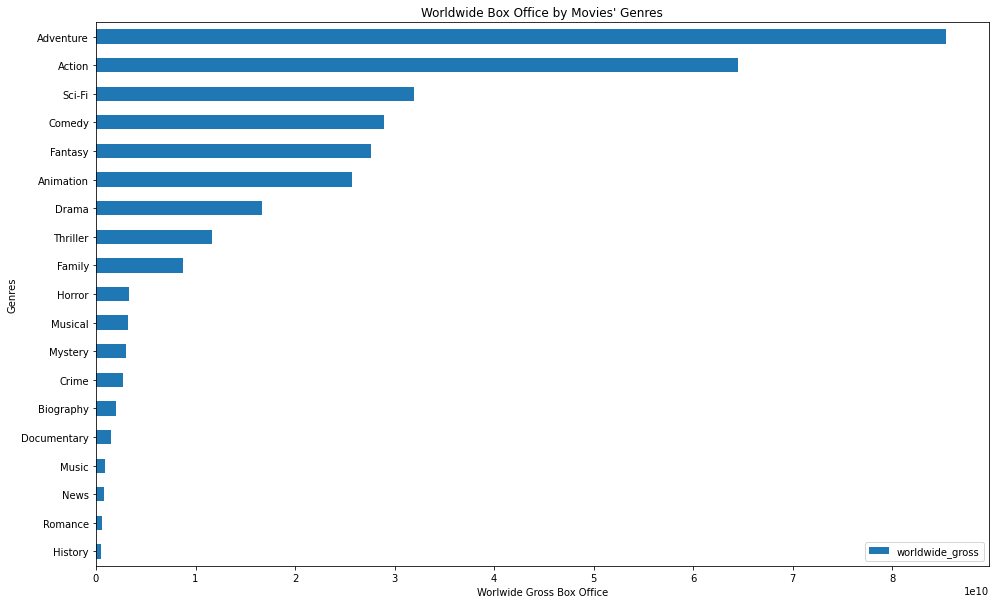

In [92]:
# Setup plots
# fig, ax = plt.subplots(figsize=(16,10))
# Create variables for easier use
# genres = genres_revenue["genres"]
# wwbox_office = genres_revenue["worldwide_gross"]

# Plot data 
# ax.barplot(genres, wwbox_office)
ax = genres_revenue.plot.barh(x="genres", y="worldwide_gross", figsize=(16,10))
ax.invert_yaxis()



# Customize appearance
ax.tick_params(axis="x")
ax.set_xlabel("Worlwide Gross Box Office")
ax.set_ylabel("Genres")
ax.set_title("Worldwide Box Office by Movies' Genres");



In [105]:
# Transforming genres as category type to allow correlation to be calculated between the 2 columns
genres_revenue["genres_cat"] = genres_revenue["genres"].astype("category").cat.codes
genres_revenue


,genres,number_movies,worldwide_gross,genres_cat
0,Adventure,105,8.541200e+10,1
1,Action,80,6.453170e+10,0
2,Sci-Fi,37,3.198190e+10,17
3,Comedy,39,2.891360e+10,4
4,Fantasy,32,2.759490e+10,9
5,Animation,34,2.571580e+10,2
6,Drama,22,1.670210e+10,7
7,Thriller,15,1.165710e+10,18
8,Family,11,8.735300e+09,8
9,Horror,5,3.278100e+09,11


In [108]:
col1 = genres_revenue["genres_cat"]
col2 = genres_revenue["worldwide_gross"]

corr = col1.corr(col2)

print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))



Correlation between  0      1
1      0
2     17
3      4
4      9
5      2
6      7
7     18
8      8
9     11
10    13
11    14
12     5
13     3
14     6
15    12
16    15
17    16
18    10
Name: genres_cat, dtype: int8  and  0     8.541200e+10
1     6.453170e+10
2     3.198190e+10
3     2.891360e+10
4     2.759490e+10
5     2.571580e+10
6     1.670210e+10
7     1.165710e+10
8     8.735300e+09
9     3.278100e+09
10    3.255500e+09
11    3.047200e+09
12    2.751400e+09
13    1.983900e+09
14    1.485900e+09
15    9.036000e+08
16    7.912000e+08
17    5.710000e+08
18    5.252000e+08
Name: worldwide_gross, dtype: float64 is:  -0.53


In [93]:
'''

Only if decide to switch again to using the df_movie_budgets

'''

'\n\nOnly if decide to switch again to using the df_movie_budgets\n\n'

In [85]:
# Filtering on movies above 500 million dollars
half_million_movies = df_movie_budgets[df_movie_budgets["worldwide_gross"] > 500000000]
half_million_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_episode,movie_title,movie_title_episode
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,,Avatar,Avatar
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,,Titanic,Titanic
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,The Force Awakens,Star Wars,Star Wars The Force Awakens
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,Infinity War,Avengers,Avengers Infinity War
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,,Jurassic World,Jurassic World
...,...,...,...,...,...,...,...,...,...,...
364,65,"Jul 2, 1991",Terminator 2: Judgment Day,100000000,203464105,515419827,1991,Judgment Day,Terminator 2,Terminator 2 Judgment Day
439,40,"Nov 19, 1999",Toy Story 2,90000000,245852179,511358276,1999,,Toy Story 2,Toy Story 2
627,28,"Nov 9, 2018",Dr. Seussâ The Grinch,75000000,270620950,511002426,2018,,Dr. Seussâ The Grinch,Dr. Seussâ The Grinch
270,71,"Mar 31, 2017",The Boss Baby,125000000,175003033,510878762,2017,,The Boss Baby,The Boss Baby


In [60]:
len(half_million_movies)

199

There are 199 movies that made box office revenues higher than 500 million dollars. 

The analysis will be based on these.

In [61]:
half_million_movies[["year", "movie_title"]].reset_index()

,index,year,movie_title
0,0,2009,Avatar
1,42,1997,Titanic
2,5,2015,Star Wars
3,6,2018,Avengers
4,33,2015,Jurassic World
...,...,...,...
194,364,1991,Terminator 2
195,439,1999,Toy Story 2
196,627,2018,Dr. Seussâ The Grinch
197,270,2017,The Boss Baby


In [62]:
onebillion_titles = half_million_movies["movie_title"].tolist()
onebillion_titles

['Avatar',
 'Titanic',
 'Star Wars',
 'Avengers',
 'Jurassic World',
 'Furious 7',
 'The Avengers',
 'Avengers',
 'Black Panther',
 'Harry Potter and the Deathly Hallows',
 'Star Wars',
 'Jurassic World',
 'Frozen',
 'Beauty and the Beast',
 'Incredibles 2',
 'The Fate of the Furious',
 'Iron Man 3',
 'Minions',
 'Aquaman',
 'The Lord of the Rings',
 'Captain America',
 'Transformers',
 'Captain Marvel',
 'Skyfall',
 'Transformers',
 'The Dark Knight Rises',
 'Toy Story 3',
 'Pirates of the Caribbean',
 'Rogue One',
 'Pirates of the Caribbean',
 'Jurassic Park',
 'Despicable Me 3',
 'Star Wars',
 'Alice in Wonderland',
 'Finding Dory',
 'Zootopia',
 'The Hobbit',
 'The Dark Knight',
 'The Lion King',
 'Despicable Me 2',
 'Harry Potter and the Sorcererâ\x80\x99s Stone',
 'Jumanji',
 'Pirates of the Caribbean',
 'The Jungle Book',
 'Harry Potter and the Deathly Hallows',
 'The Hobbit',
 'The Hobbit',
 'Harry Potter and the Order of the Phoenix',
 'Shrek 2',
 'Finding Nemo',
 'Harry Potte

### What was the genre of these movies? 

Genres are indicated in the df_movie_info table and have the id column. 
Join one billion plus movies to this table to identify the main info of these movies, including genres - 
but also runtime? 

In [63]:
movie_basics[["primary_title", "start_year"]]

,primary_title,start_year
0,Sunghursh,2013
1,One Day Before the Rainy Season,2019
2,The Other Side of the Wind,2018
3,Sabse Bada Sukh,2018
4,The Wandering Soap Opera,2017
...,...,...
146139,Kuambil Lagi Hatiku,2019
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015
146141,Dankyavar Danka,2013
146142,6 Gunn,2017


In [65]:
top_movies = half_million_movies["movie_title"].tolist()

for movie in top_movies:
    print(movie_basics[movie_basics["movie_title"] == movie]["movie_title"].tolist())

['Avatar']
['Titanic', 'Titanic', 'Titanic', 'Titanic', 'Titanic']
['Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars']
['Avengers', 'Avengers', 'Avengers', 'Avengers', 'Avengers']
['Jurassic World', 'Jurassic World']
['Furious 7']
['The Avengers']
['Avengers', 'Avengers', 'Avengers', 'Avengers', 'Avengers']
['Black Panther']
['Harry Potter and the Deathly Hallows', 'Harry Potter and the Deathly Hallows']
['Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars', 'Star Wars']
['Jurassic World', 'Jurassic World']
['Frozen', 'Frozen', 'Frozen']
['Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast']
['Incredibles 2']
['The Fate of the Furious']
['Iron Man 3']
['Minions', 'Minions']
['Aquaman']
[]
['Captain America', 'Captain America', 'Captain America']
['Transformers', 'Transformers',

In [66]:
movie_basics[movie_basics['movie_title'].isin(top_movies)]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode,movie_title,movie_title_episode
60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",,Jurassic World,Jurassic World
71,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",,Tangled,Tangled
104,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",,Toy Story 3,Toy Story 3
126,tt0448694,Puss in Boots,Puss in Boots,2011,90.0,"Action,Adventure,Animation",,Puss in Boots,Puss in Boots
131,tt0451279,Wonder Woman,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",,Wonder Woman,Wonder Woman
...,...,...,...,...,...,...,...,...,...
143910,tt9603208,Mission: Impossible 8,Mission: Impossible 8,2022,NaN,"Action,Adventure,Thriller",Impossible 8,Mission,Mission Impossible 8
143911,tt9603212,Mission: Impossible 7,Mission: Impossible 7,2021,NaN,"Action,Adventure,Thriller",Impossible 7,Mission,Mission Impossible 7
144180,tt9635760,Star Wars: Shadow of the Jedi,Star Wars: Shadow of the Jedi,2019,NaN,"Action,Adventure,Fantasy",Shadow of the Jedi,Star Wars,Star Wars Shadow of the Jedi
144696,tt9698912,Aladdin,Aladdin,2017,NaN,Fantasy,,Aladdin,Aladdin


In [67]:
"""
Verifying how the titles in both dataframes could match. 
The ones not automatically identified were those with colons:

Star Wars Ep. VII: The Force Awakens'
Harry Potter and the Deathly Hallows: Part II'
Star Wars Ep. VIII: The Last Jedi'

""" 

"\nVerifying how the titles in both dataframes could match. \nThe ones not automatically identified were those with colons:\n\nStar Wars Ep. VII: The Force Awakens'\nHarry Potter and the Deathly Hallows: Part II'\nStar Wars Ep. VIII: The Last Jedi'\n\n"

In [68]:
# Now join on year and movie_title


In [69]:
half_million_movies[half_million_movies["movie"].
                   str.contains("(?i)The Force Awakens")]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_episode,movie_title,movie_title_episode
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,The Force Awakens,Star Wars,Star Wars The Force Awakens


In [70]:
movie_basics[movie_basics["primary_title"].
             str.contains("(?i)Pirates of the Caribbean")]


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode,movie_title,movie_title_episode
6448,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",On Stranger Tides,Pirates of the Caribbean,Pirates of the Caribbean On Stranger Tides
17740,tt1790809,Pirates of the Caribbean: Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales,2017,129.0,"Action,Adventure,Fantasy",Dead Men Tell No Tales,Pirates of the Caribbean,Pirates of the Caribbean Dead Men Tell No Tales
112580,tt6601316,Lionfish: New Pirates of the Caribbean,Lionfish: New Pirates of the Caribbean,2017,52.0,Documentary,New Pirates of the Caribbean,Lionfish,Lionfish New Pirates of the Caribbean


In [71]:
movie_basics[movie_basics["movie_title"].
                   str.contains("(?i)avatar'")]


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode,movie_title,movie_title_episode


In [72]:
# df_tmdb_movies[df_tmdb_movies["original_title"].str.contains("(?i)Star Wars")]

Join the two dataframes

In [115]:
# Join on movie title and year 
halfmillion_basics = pd.merge(half_million_movies, movie_basics, how="left", left_on=["movie_title"], right_on=["movie_title"])

halfmillion_basics.head()








,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_episode_x,movie_title,movie_title_episode_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode_y,movie_title_episode_y
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,,Avatar,Avatar,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,,Avatar
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,,Titanic,Titanic,tt2169432,Titanic: 100 Years On,Titanic: 100 Years On,2012.0,70.0,None,100 Years On,Titanic 100 Years On
2,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,,Titanic,Titanic,tt2495766,Titanic,Titanic,2012.0,NaN,Adventure,,Titanic
3,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,,Titanic,Titanic,tt4411166,Titanic: Band of Courage,Titanic: Band of Courage,2014.0,59.0,None,Band of Courage,Titanic Band of Courage
4,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,,Titanic,Titanic,tt5713960,Titanic: Sinking the Myths,Titanic: Sinking the Myths,2017.0,176.0,Documentary,Sinking the Myths,Titanic Sinking the Myths


In [96]:
# Review the ones that did not get merged
# Can we estimate that Avatar 1 and 2 are the same genres. probably, in which case could merge on movie and not movie_title
# only for those missing. 
# Drop those rows and add the modified ones.


In [116]:
halfmillion_basics[halfmillion_basics["genres"].isnull()]["movie"].tolist()

['Titanic',
 'Titanic',
 'The Lord of the Rings: The Return of the King',
 'Harry Potter and the Sorcererâ\x80\x99s Stone',
 'Harry Potter and the Order of the Phoenix',
 'Shrek 2',
 'Finding Nemo',
 'Harry Potter and the Half-Blood Prince',
 'The Lord of the Rings: The Two Towers',
 'Harry Potter and the Goblet of Fire',
 'Spider-Man 3',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Harry Potter and the Chamber of Secrets',
 'Guardians of the Galaxy Vol 2',
 'Inside Out',
 'Inside Out',
 'Shrek the Third',
 'Coco',
 'Harry Potter and the Prisoner of Azkaban',
 'Spider-Man 2',
 'ET: The Extra-Terrestrial',
 'Fast and Furious 6',
 'Indiana Jones and the Kingdom of the Crystal Skull',
 'The Da Vinci Code',
 '2012',
 'The Matrix Reloaded',
 'Up',
 'Forrest Gump',
 'The Sixth Sense',
 'Kung Fu Panda',
 'Ratatouille',
 'Hancock',
 'The Passion of the Christ',
 'The Lost World: Jurassic Park',
 'Mamma Mia!',
 'The Incredibles',
 'Casino Royale',
 'Quantum of Solace',
 'I am Legend'

In [74]:
# does id 1 in df_movie_info correspond to Avatar?

# df_movie_info[df_movie_info["id"] == 1]


In [75]:
# df_movie_info id does not correspond to the ids of the movies in half_million_movies. 

In [76]:
persons_df["primary_name"].unique()

array(['Mary Ellen Bauder', 'Joseph Bauer', 'Bruce Baum', ...,
       'Joo Yeon So', 'Michelle Modigliani', 'Pegasus Envoyé'],
      dtype=object)

In [77]:
# are there other currencies than box office? 

df_movie_info[df_movie_info["currency"].notnull()]["currency"].unique()

# no - only $

array(['$'], dtype=object)

In [78]:
# Inspect overall shape and info of the dataframe
df_movie_info.shape
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [79]:
# missing revenues in box office in df_movie_info but is it the same info in the first table

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

Using a Google sheet, I have listed all column names from all dataframes/tables to identify the ones I wanted to keep for the analysis.

The table df_movie_budgets seem to have all the necessary information to calculate performance: 

    1. domestic
    2. foreign 
    3. worldwide gross
    4. production budgets

It was verified before that how titles are named in df_movie_gross don't represent the majority of how they are named in other tables, whereas df_movie_budgets do.

Let's verify that worldwide gross indicated in df_movie_budgets correspond to the one indicated in df_movie_gross 

In [80]:
movie_non_null = movie_basics[movie_basics["original_title"].notnull()]

movie_non_null[movie_non_null["original_title"].str.contains("Avengers")]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode,movie_title,movie_title_episode
356,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",,The Avengers,The Avengers
1030,tt10075836,The Avengers Assemble Premiere,The Avengers Assemble Premiere,2012,NaN,Action,,The Avengers Assemble Premiere,The Avengers Assemble Premiere
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Age of Ultron,Avengers,Avengers Age of Ultron
72820,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Infinity War,Avengers,Avengers Infinity War
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",Endgame,Avengers,Avengers Endgame
105584,tt6172666,Avengers of Justice: Farce Wars,Avengers of Justice: Farce Wars,2018,87.0,"Action,Comedy,Family",Farce Wars,Avengers of Justice,Avengers of Justice Farce Wars
138087,tt8875872,Avengers: Reassembled,Avengers: Reassembled,2018,52.0,Sci-Fi,Reassembled,Avengers,Avengers Reassembled
141910,tt9303032,Avengers: Legacy,Avengers: Legacy,2019,NaN,Sci-Fi,Legacy,Avengers,Avengers Legacy


In [81]:
# Avengers in movie_akas

movie_akas_df[(movie_akas_df["title"].str.contains("Avengers")) & (movie_akas_df["is_original_title"] == 1)]



,movie_id,ordering,title,region,language,types,attributes,is_original_title
69881,tt2395427,24,Avengers: Age of Ultron,None,None,original,None,1.0
81106,tt0848228,19,The Avengers,None,None,original,None,1.0
190575,tt4154796,15,Avengers: Endgame,None,None,original,None,1.0
311338,tt4154756,30,Avengers: Infinity War,None,None,original,None,1.0


In [82]:
# movie title in movie_budgets

df_movie_budgets[df_movie_budgets["movie"].str.contains("Avengers")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_episode,movie_title,movie_title_episode
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,Infinity War,Avengers,Avengers Infinity War
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,,The Avengers,The Avengers
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,Age of Ultron,Avengers,Avengers Age of Ultron
934,35,"Aug 14, 1998",The Avengers,60000000,23385416,48585416,1998,,The Avengers,The Avengers


In [83]:
df_movie_budgets[df_movie_budgets["movie"].str.contains("The Avengers")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_episode,movie_title,movie_title_episode
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,,The Avengers,The Avengers
934,35,"Aug 14, 1998",The Avengers,60000000,23385416,48585416,1998,,The Avengers,The Avengers


In [84]:
df_movie_gross[df_movie_gross["title"].str.contains("The Avengers")]

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09


In [85]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode,movie_title,movie_title_episode
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",,Sunghursh,Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",,One Day Before the Rainy Season,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,,The Other Side of the Wind,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",,Sabse Bada Sukh,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",,The Wandering Soap Opera,The Wandering Soap Opera


In [86]:
# First, try to add movie_id to df_movie_gross
new_df = pd.merge(df_movie_budgets, movie_basics, how="left", left_on=["movie", "year"], right_on=["primary_title", "start_year"])
new_df

# using left join because can only measure the movies that have revenue associated to it



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_episode_x,movie_title_x,movie_title_episode_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode_y,movie_title_y,movie_title_episode_y
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,,Avatar,Avatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,,Titanic,Titanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,The Force Awakens,Star Wars,Star Wars The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,Infinity War,Avengers,Avengers Infinity War,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",Infinity War,Avengers,Avengers Infinity War
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,,Jurassic World,Jurassic World,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",,Jurassic World,Jurassic World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,75,"Dec 31, 2005",Insomnia Manica,500000,0,0,2005,,Insomnia Manica,Insomnia Manica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5841,74,"Jul 17, 2012",Girls Gone Dead,500000,0,0,2012,,Girls Gone Dead,Girls Gone Dead,tt1884318,Girls Gone Dead,Girls Gone Dead,2012.0,104.0,"Comedy,Horror",,Girls Gone Dead,Girls Gone Dead
5842,73,"Apr 3, 2012",Enter Nowhere,500000,0,0,2012,,Enter Nowhere,Enter Nowhere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5843,72,"Dec 31, 2010",Drones,500000,0,0,2010,,Drones,Drones,tt1232775,Drones,Drones,2010.0,98.0,Comedy,,Drones,Drones


In [87]:
# verify that avatar does not have a start date on movie_basics
movie_basics[movie_basics["primary_title"].notnull().astype(str).str.contains("(?i)avatar")]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_episode,movie_title,movie_title_episode


In [88]:
df_movie_gross[df_movie_gross["title"].str.contains("(?i)avatar")]

,title,studio,domestic_gross,foreign_gross,year,total_gross
128,Avatar: Special Edition,Fox,10700000.0,22500000.0,2010,33200000.0


In [89]:
movie_akas_df[(movie_akas_df["title"].str.contains("(?i)avatar")) 
              & (movie_akas_df["is_original_title"] == 1)]


,movie_id,ordering,title,region,language,types,attributes,is_original_title
48402,tt2271191,1,Avatars as Prostitutes,None,None,original,None,1.0
60319,tt1757678,4,Avatar 3,None,None,original,None,1.0
62979,tt1630029,7,Avatar 2,None,None,original,None,1.0
109149,tt1854506,2,Aliens vs. Avatars,None,None,original,None,1.0
151589,tt0253093,1,Gangavataran,None,None,original,None,1.0
200643,tt3095356,3,Avatar 4,None,None,original,None,1.0


In [90]:
# Here you run your code to clean the data


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [91]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [92]:
# Closing connection
# conn.close()